# Numpy

넘파이는 다차원 배열을 다루는 라이브러리이다.
- 0차원: 스칼라(Scalar)
- 1차원: 벡터(Vector)
- 2차원: 매트릭스(Matrix)
- 3차원: 텐서(Tensor)
- 다차원: mdarray(Multi Demension Array)

#### 장점
- 빠르다.
    - 파이썬은 원래 느린 것이 단점이다. 
    - 파이썬은 Glue language인 점을 이용해서 backed를 C로 구현해서 속도가 빠르다.
- 사용하기 편하다.
    - 파이썬에도 array라는 배열 라이브러리가 있으나 어렵다.
    
#### 특징
- 위와 같은 장점으로 파이썬이 인기를 얻는데 크게 기여하였다.
- 아나콘다 사장이 numpy를 만든 사람이다.
- 인기있는 Tensorflow, scikit learn, pytorch 등 딥러닝, 머신러닝 라이브러리들 모두 numpy를 기반으로 만들어졌다. 
    - low level에서 이해하고 사용하려면 numpy를 알아야한다.
    - tensorflow, pytorch의 tensor는 numpy를 gpu 지원하게하고, 약간 변환 시켰다. (대충 넘파이를 알아야한다는 말)

In [1]:
import numpy as np

In [2]:
np.__version__

'1.17.3'

> - numpy 객체는 homogeneous, sequence, immutable한 container이다.
    - homogeneous이므로 하나의 타입만 가질 수 있다.
        - 타입 체크를 안하므로 빠르다.
    - 순서가 중요한 sequence이다.
        - 행렬과 벡터를 표현하려면 순서가 중요하다.
    - immutable하다.
        - 속도가 빠르다.
        - 함수형 패러다임에 적합하다.
        - 값을 추가하거나 삭제할 수 없다.

값을 생성하는 방법 3가지
- instance
    - 클래스를 인스턴스화한다.
- literal
    - 인스턴스하지 않고 간단하게 값을 만든다.
- factory method
    - 객체를 생성하는 함수
    - ex) iter

In [15]:
gpas_as_list = [4.0, 3.286, 3.5]

In [16]:
gpas = np.array(gpas_as_list)

> - numpy에서는 주로 factory method 방식으로 값을 만드는 방법을 사용한다.
- `np.array`는 factory method

In [17]:
gpas

array([4.   , 3.286, 3.5  ])

> array 라고 나오면 numpy 객체이다.

In [20]:
gpas = np.array([1,2,'3'])
gpas

array(['1', '2', '3'], dtype='<U11')

> - homogeneous이므로 dtype이 다 통일되었다.
- Error를 내는 대신에 자동으로 통일 시킨다는 점에 유의하자.
- 우선순위는 str > float > int

In [25]:
gpas = np.array([1,2,3])
gpas.shape

(3,)

> - 차원과 원소 개수를 보여준다.
- (3,)은 1개 차원이고, 1차원의 원소가 3개이다.
- `shape`만으로 `.ndim`을 알 수 있다. (`shape`의 값의 개수가 곧 차원이다.)
    - `ndim`은 총 차원의 수
- `shape`만으로 `.size`를 알 수 있다. (`shape`의 값들을 곱하면 총 원소 개수이다.)
    - `size`는 총 원소의 개수
- 행렬 계산은 모양이 맞아야하므로 shape 확인을 잘 해야한다.

In [26]:
gpas.dtype

dtype('int32')

> - 데이터 타입을 보여준다.
- property라서 동적으로 출력한다.(dtype이 다르면 다르게 출력한다.)
- `dtype`만으로 `itemsize`를 알 수 있다. (`dtype`의 숫자 나누기 8)

In [28]:
x = np.zeros((3,3))
x

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

> - `np.array`는 컨테이너를 numpy 객체로 바꿔줬다.
- 컨테이너 객체가 없어도 바로 numpy 객체를 만들 수 있다. 
- 자매품: `np.ones`, `np.full` (full은 채울 값을 추가로 알려줘야한다.)

In [31]:
x = np.eye(4)
x

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [36]:
x = np.eye(4,k=2)
x

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [33]:
x = np.identity(4)
x

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

> - 단위행렬을 만드는 방법은 `np.eye`와, `np.identity`가 있다.
- `np.eye`는 대각 위치를 조정하거나 행렬 크기를 바꾸는 등의 옵션이 있지만, `np.identity`는 아무런 옵션 없이 단위행렬만 만들 수 있다.

In [56]:
import tensorflow as tf

a = tf.constant(x)
print(a)

tf.identity(a) # tensor의 기본정보를 알려준다.

tf.Tensor([4.    3.286 3.5  ], shape=(3,), dtype=float64)


<tf.Tensor: id=7, shape=(3,), dtype=float64, numpy=array([4.   , 3.286, 3.5  ])>

- tensorflow의 `tensor`도 넘파이로 만들어져서 거의 그대로 사용할 수 있다. 다만 조금씩 다른 부분이 있으므로 헷갈리지 않게 조심!
    - `identify`는 numpy와 다름

In [38]:
x = np.empty(3)
x

array([4.   , 3.286, 3.5  ])

> - `empty`는 메모리에 남아있는 쓰게기 값으로 채워준다.
- numpy도 C기반으로 만들어졌기 때문이다.

In [39]:
np.ones_like(x)

array([1., 1., 1.])

> - like가 붙으면 인자로 받은 array와 shape이 같게 만들어 준다.
- shape을 계산해서 만들 필요 없이 바로 만들 수 있어서 자주 사용한다.

In [65]:
import cv2
import matplotlib.pyplot as plt

In [60]:
img = cv2.imread("practice/1.jpg")

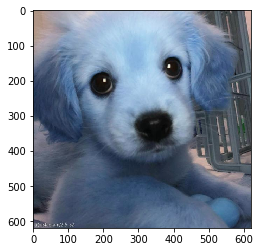

In [66]:
plt.imshow(cv2.(img))

In [61]:
img

array([[[171, 151, 134],
        [171, 151, 134],
        [171, 151, 134],
        ...,
        [215, 183, 172],
        [216, 184, 173],
        [217, 185, 174]],

       [[170, 150, 133],
        [170, 150, 133],
        [170, 150, 133],
        ...,
        [213, 181, 170],
        [214, 182, 171],
        [215, 183, 172]],

       [[168, 148, 131],
        [168, 148, 131],
        [169, 149, 132],
        ...,
        [211, 179, 168],
        [212, 180, 169],
        [213, 181, 170]],

       ...,

       [[ 95,  93, 112],
        [100,  98, 117],
        [105, 104, 120],
        ...,
        [ 59,  73,  95],
        [ 63,  77,  96],
        [ 66,  80,  99]],

       [[101,  99, 118],
        [103, 101, 120],
        [106, 104, 123],
        ...,
        [ 62,  76,  98],
        [ 66,  80,  99],
        [ 68,  82, 101]],

       [[100,  98, 117],
        [101,  99, 118],
        [102, 100, 119],
        ...,
        [ 62,  76,  98],
        [ 65,  79,  98],
        [ 66,  80,  99]]

In [63]:
img.shape

(620, 620, 3)

> - 우리는 시각 지능 수업이다.
- 이미지는 다차원 어레이이다.
- OpenCV 같은 유명 라이브러리도 모두 numpy로 되어있다. (대충 넘파이 엄청 중요하다는 말)

In [67]:
np.info("array")

     *** Found in numpy ***
array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    __array__ method returns an array, or any (nested) sequence.
dtype : data-type, optional
    The desired data-type for the array.  If not given, then the type will
    be determined as the minimum type required to hold the objects in the
    sequence.  This argument can only be used to 'upcast' the array.  For
    downcasting, use the .astype(t) method.
copy : bool, optional
    If true (default), then the object is copied.  Otherwise, a copy will
    only be made if __array__ returns a copy, if obj is a nested sequence,
    or if a copy is needed to satisfy any of the other requirements
    (`dtype`, `order`, etc.).
order : {'K', 'A', 'C', 'F'}, optional
    Specify the memory layout of the array. If object is not an array, the
    newly created array wil

In [68]:
np.lookfor("array")

Search results for 'array'
--------------------------
numpy.array
    Create an array.
numpy.asarray
    Convert the input to an array.
numpy.ndarray
    ndarray(shape, dtype=float, buffer=None, offset=0,
numpy.asfarray
    Return an array converted to a float type.
numpy.recarray
    Construct an ndarray that allows field access using attributes.
numpy.all
    Test whether all array elements along a given axis evaluate to True.
numpy.any
    Test whether any array element along a given axis evaluates to True.
numpy.array_str
    Return a string representation of the data in an array.
numpy.chararray
    chararray(shape, itemsize=1, unicode=False, buffer=None, offset=0,
numpy.dot
    Dot product of two arrays. Specifically,
numpy.exp
    Calculate the exponential of all elements in the input array.
numpy.eye
    Return a 2-D array with ones on the diagonal and zeros elsewhere.
numpy.fix
    Round to nearest integer towards zero.
numpy.pad
    Pad an array.
numpy.put
    Replaces specif

> - numpy에서는 도움말이 `np.info`, `np.lookfor`가 있다.
- `np.info`는 설명을 알려준다.
- `np.lookfor`는 인자(이름)이 들어간 것을 모두 알려준다. = 검색
- python에는 `help`가 있었다.